In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
!pip install --user tensorflow



In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plantVillage",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
  class_names = dataset.class_names
  class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
68*32


2176

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy())
    print(image_batch[0].shape)

(32, 256, 256, 3)
[0 1 0 1 0 1 0 2 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 2 1 1]
[[[171. 168. 179.]
  [160. 157. 168.]
  [159. 156. 167.]
  ...
  [188. 185. 194.]
  [212. 209. 218.]
  [211. 208. 217.]]

 [[172. 169. 180.]
  [164. 161. 172.]
  [163. 160. 171.]
  ...
  [191. 188. 197.]
  [194. 191. 200.]
  [189. 186. 195.]]

 [[171. 168. 179.]
  [168. 165. 176.]
  [167. 164. 175.]
  ...
  [198. 195. 204.]
  [190. 187. 196.]
  [188. 185. 194.]]

 ...

 [[132. 125. 133.]
  [138. 131. 139.]
  [143. 136. 144.]
  ...
  [131. 125. 135.]
  [129. 123. 133.]
  [126. 120. 130.]]

 [[134. 127. 135.]
  [128. 121. 129.]
  [141. 134. 142.]
  ...
  [134. 128. 138.]
  [123. 117. 127.]
  [109. 103. 113.]]

 [[140. 133. 141.]
  [147. 140. 148.]
  [147. 140. 148.]
  ...
  [143. 137. 147.]
  [151. 145. 155.]
  [146. 140. 150.]]]
(256, 256, 3)


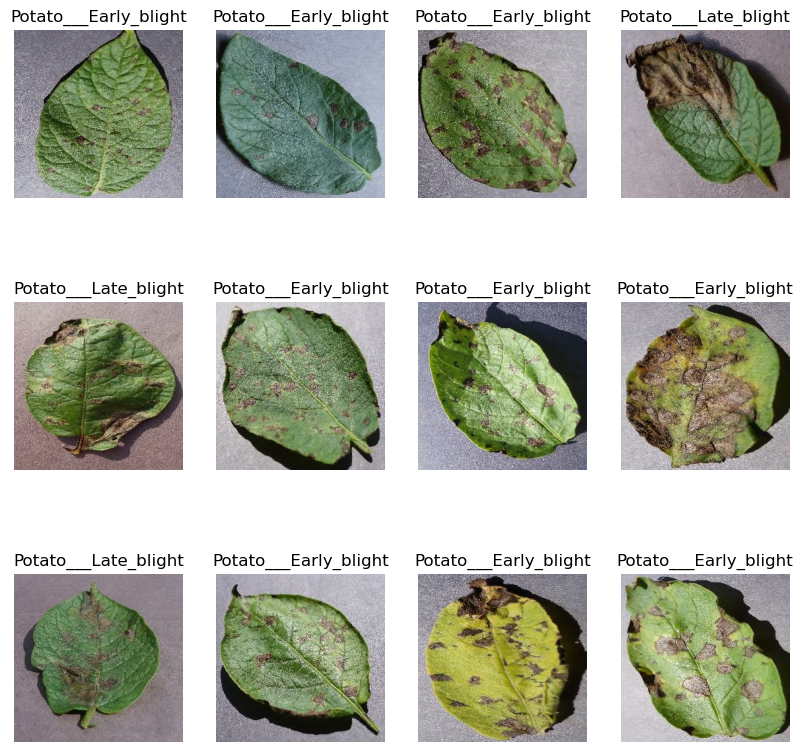

In [10]:
# sara image aik me messed up dekhega so size fixed kerna hh
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        # aik hi image show hoga ager subplot wala nhi use kiya to
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
         # display label
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
       

In [11]:
len(dataset)

68

In [12]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [13]:
train_size=0.8
len(dataset)*train_size


54.400000000000006

In [14]:
train_ds=dataset.take(54)
# not exactly test dataset it will also break into validation and test further
test_ds = dataset.skip(54)
len(test_ds)

14

In [15]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [18]:
# all spit whatever i have done above can be done by a one line function below ... default 80%, 10%, 10%
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size) 
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
     

In [19]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)

(256, 256, 3)


In [24]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[194. 176. 174.]
  [193. 175. 173.]
  [192. 174. 172.]
  ...
  [173. 154. 156.]
  [168. 149. 151.]
  [162. 143. 145.]]

 [[191. 173. 171.]
  [195. 177. 175.]
  [198. 180. 178.]
  ...
  [170. 151. 153.]
  [168. 149. 151.]
  [167. 148. 150.]]

 [[189. 171. 169.]
  [194. 176. 174.]
  [198. 180. 178.]
  ...
  [166. 147. 149.]
  [165. 146. 148.]
  [166. 147. 149.]]

 ...

 [[169. 140. 136.]
  [184. 155. 151.]
  [169. 140. 136.]
  ...
  [158. 130. 127.]
  [164. 136. 133.]
  [172. 144. 141.]]

 [[172. 143. 139.]
  [193. 164. 160.]
  [185. 156. 152.]
  ...
  [153. 125. 122.]
  [160. 132. 129.]
  [168. 140. 137.]]

 [[174. 145. 141.]
  [177. 148. 144.]
  [169. 140. 136.]
  ...
  [161. 133. 130.]
  [160. 132. 129.]
  [158. 130. 127.]]]


In [25]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.6313726  0.6431373  0.7176471 ]
  [0.65882355 0.67058825 0.74509805]
  [0.67058825 0.68235296 0.75686276]
  ...
  [0.29803923 0.32156864 0.38431373]
  [0.3647059  0.38431373 0.45882353]
  [0.42352942 0.4509804  0.52156866]]

 [[0.6        0.6117647  0.6862745 ]
  [0.61960787 0.6313726  0.7058824 ]
  [0.63529414 0.64705884 0.72156864]
  ...
  [0.53333336 0.54509807 0.6117647 ]
  [0.36078432 0.38039216 0.45490196]
  [0.27058825 0.29803923 0.36862746]]

 [[0.6        0.6117647  0.6862745 ]
  [0.6117647  0.62352943 0.69803923]
  [0.627451   0.6392157  0.7137255 ]
  ...
  [0.45882353 0.47058824 0.5372549 ]
  [0.44313726 0.46666667 0.5294118 ]
  [0.41960785 0.44313726 0.5058824 ]]

 ...

 [[0.7058824  0.7176471  0.78431374]
  [0.69803923 0.70980394 0.7764706 ]
  [0.69411767 0.7058824  0.77254903]
  ...
  [0.42745098 0.41960785 0.4745098 ]
  [0.56078434 0.5529412  0.60784316]
  [0.4627451  0.45490196 0.50980395]]

 [[0.7058824  0.7176471  0.78431374]
  [0.69803923 0.70980394 0.7764706 ]


In [26]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
]
                   )

In [27]:
 data_augmentation = tf.keras.Sequential([
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2),])
# other contrast , zoom bhi ker sakte hn

In [28]:
(BATCH_SIZE)
 

32

In [29]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
# 32 , 64 are number of filters
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), 
])
model.build(input_shape=input_shape)

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
) 

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4843 - loss: 0.9332 - val_accuracy: 0.4688 - val_loss: 0.8007
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5783 - loss: 0.8059 - val_accuracy: 0.6354 - val_loss: 0.7627
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7135 - loss: 0.6211 - val_accuracy: 0.8385 - val_loss: 0.3799
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7863 - loss: 0.5060 - val_accuracy: 0.8698 - val_loss: 0.3340
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8287 - loss: 0.4138 - val_accuracy: 0.9010 - val_loss: 0.2305
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8845 - loss: 0.2989 - val_accuracy: 0.9375 - val_loss: 0.1939
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9170 - loss: 0.2235 - val_accuracy: 0.8385 - val_loss: 0.3670
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9404 - loss: 0.1858 - val_accuracy: 0.8438 - val_loss

In [33]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step - accuracy: 0.9890 - loss: 0.0325


In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
# history.history['loss']

In [37]:
len(history.history['loss'])

50

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

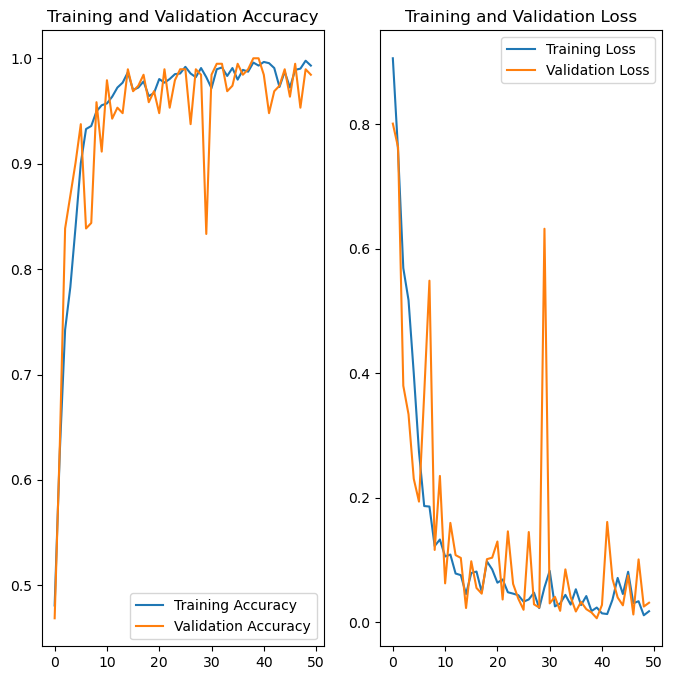

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
# model training completed 

Actual label: 1
Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
[8.9953863e-07 9.9999905e-01 5.3659707e-12]
predicted label: 1
predicted label: Potato___Late_blight


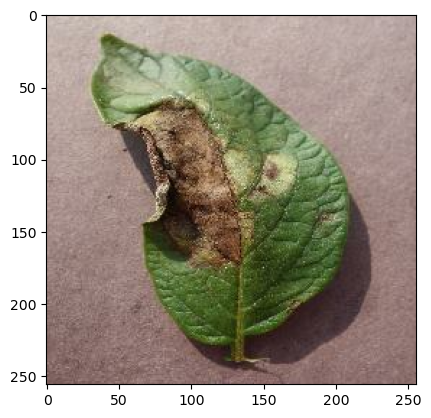

In [41]:
# prediction 
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    # true value
    print("Actual label:",labels_batch[0].numpy())
    print("Actual label:",class_names[labels_batch[0].numpy()])
    plt.imshow(first_image)
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:",np.argmax(batch_prediction[0]))
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [42]:
 def predict(model, img):
     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
     img_array = tf.expand_dims(img_array, 0)
     predictions = model.predict(img_array)
     predicted_class = class_names[np.argmax(predictions[0])]
     confidence = round(100 * (np.max(predictions[0])), 2)
     return predicted_class, confidence                                                                 

In [43]:
# import os


# model_version = 1
# save_path = f"../models/{model_version}"
# os.makedirs(save_path, exist_ok=True)

# model.export(save_path)
model.save("../models/potatoes.h5")


